# Global Power Plant Database Project

## 1. Prediction of capacity_mw, 2. Prediction of Primary fuel 

In [10]:
#importing the rquired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [11]:
df= pd.read_csv("Global_power.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Lets explore the data 

df.shape

(908, 25)

908 crows and 25 columns are available in the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [14]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [15]:
#let's check the null values

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [16]:
#Let's remove the columns having lots of null values

df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','owner'],axis=1, inplace= True)

In [17]:
df.shape

(908, 19)

In [18]:
#to check the no. of counteries present in the dataset

df['country'].unique()         

array(['IND'], dtype=object)

Only india is availabe in the dataset .

In [19]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [20]:
#let's try to fill the null values
#fill the null values of object type data with mode

df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [21]:
#filling the NaN values of continous column
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    float64
 9   source                  908 non-null    object 
 10  url                     908 non-null    object 
 11  geolocation_source      908 non-null    object 
 12  year_of_capacity_data   908 non-null    float64
 13  generation_gwh_2013     908 non-null    float64
 14  generation_gwh_2014     908 non-null    fl

Now there is no null values in the dataset , so we can proceed further for data analysis part and feature selection part. 

In [36]:
#Dropping the columns which are not required in the model building 

df.drop(columns=['country','country_long','name','gppd_idnr','source','url','geolocation_source','generation_data_source'], axis=1, inplace= True)

In [37]:
df.shape

(908, 10)

In [40]:
#removing a column not required

#df.drop(['year_of_capacity_data'],axis= 1, inplace = True)

# Data Analysis (EDA)

In [41]:
#Statistical summary

df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,3.205947,57.679515,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,2.281339,15.011342,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,51.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,3.000000,67.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,6.000000,67.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,7.000000,72.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


There are many ouliers present in the data as in many columns there is a huge difference between 75% and max value, and skewness is also present , we'll check both with the defined techniques.

In [42]:
df.shape

(908, 10)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

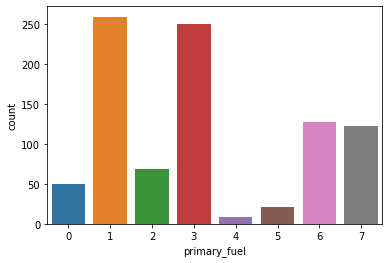

In [43]:
#Count plot for catergorical column
sns.countplot(df['primary_fuel'])

In [44]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,65,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,67,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,67,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,58,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,69,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


### Label Encoding 

In [45]:
#import the required liabrary
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['commissioning_year']=le.fit_transform(df['commissioning_year'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int64  
 4   commissioning_year   908 non-null    int64  
 5   generation_gwh_2013  908 non-null    float64
 6   generation_gwh_2014  908 non-null    float64
 7   generation_gwh_2015  908 non-null    float64
 8   generation_gwh_2016  908 non-null    float64
 9   generation_gwh_2017  908 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 71.1 KB


Now , there is no object type column.

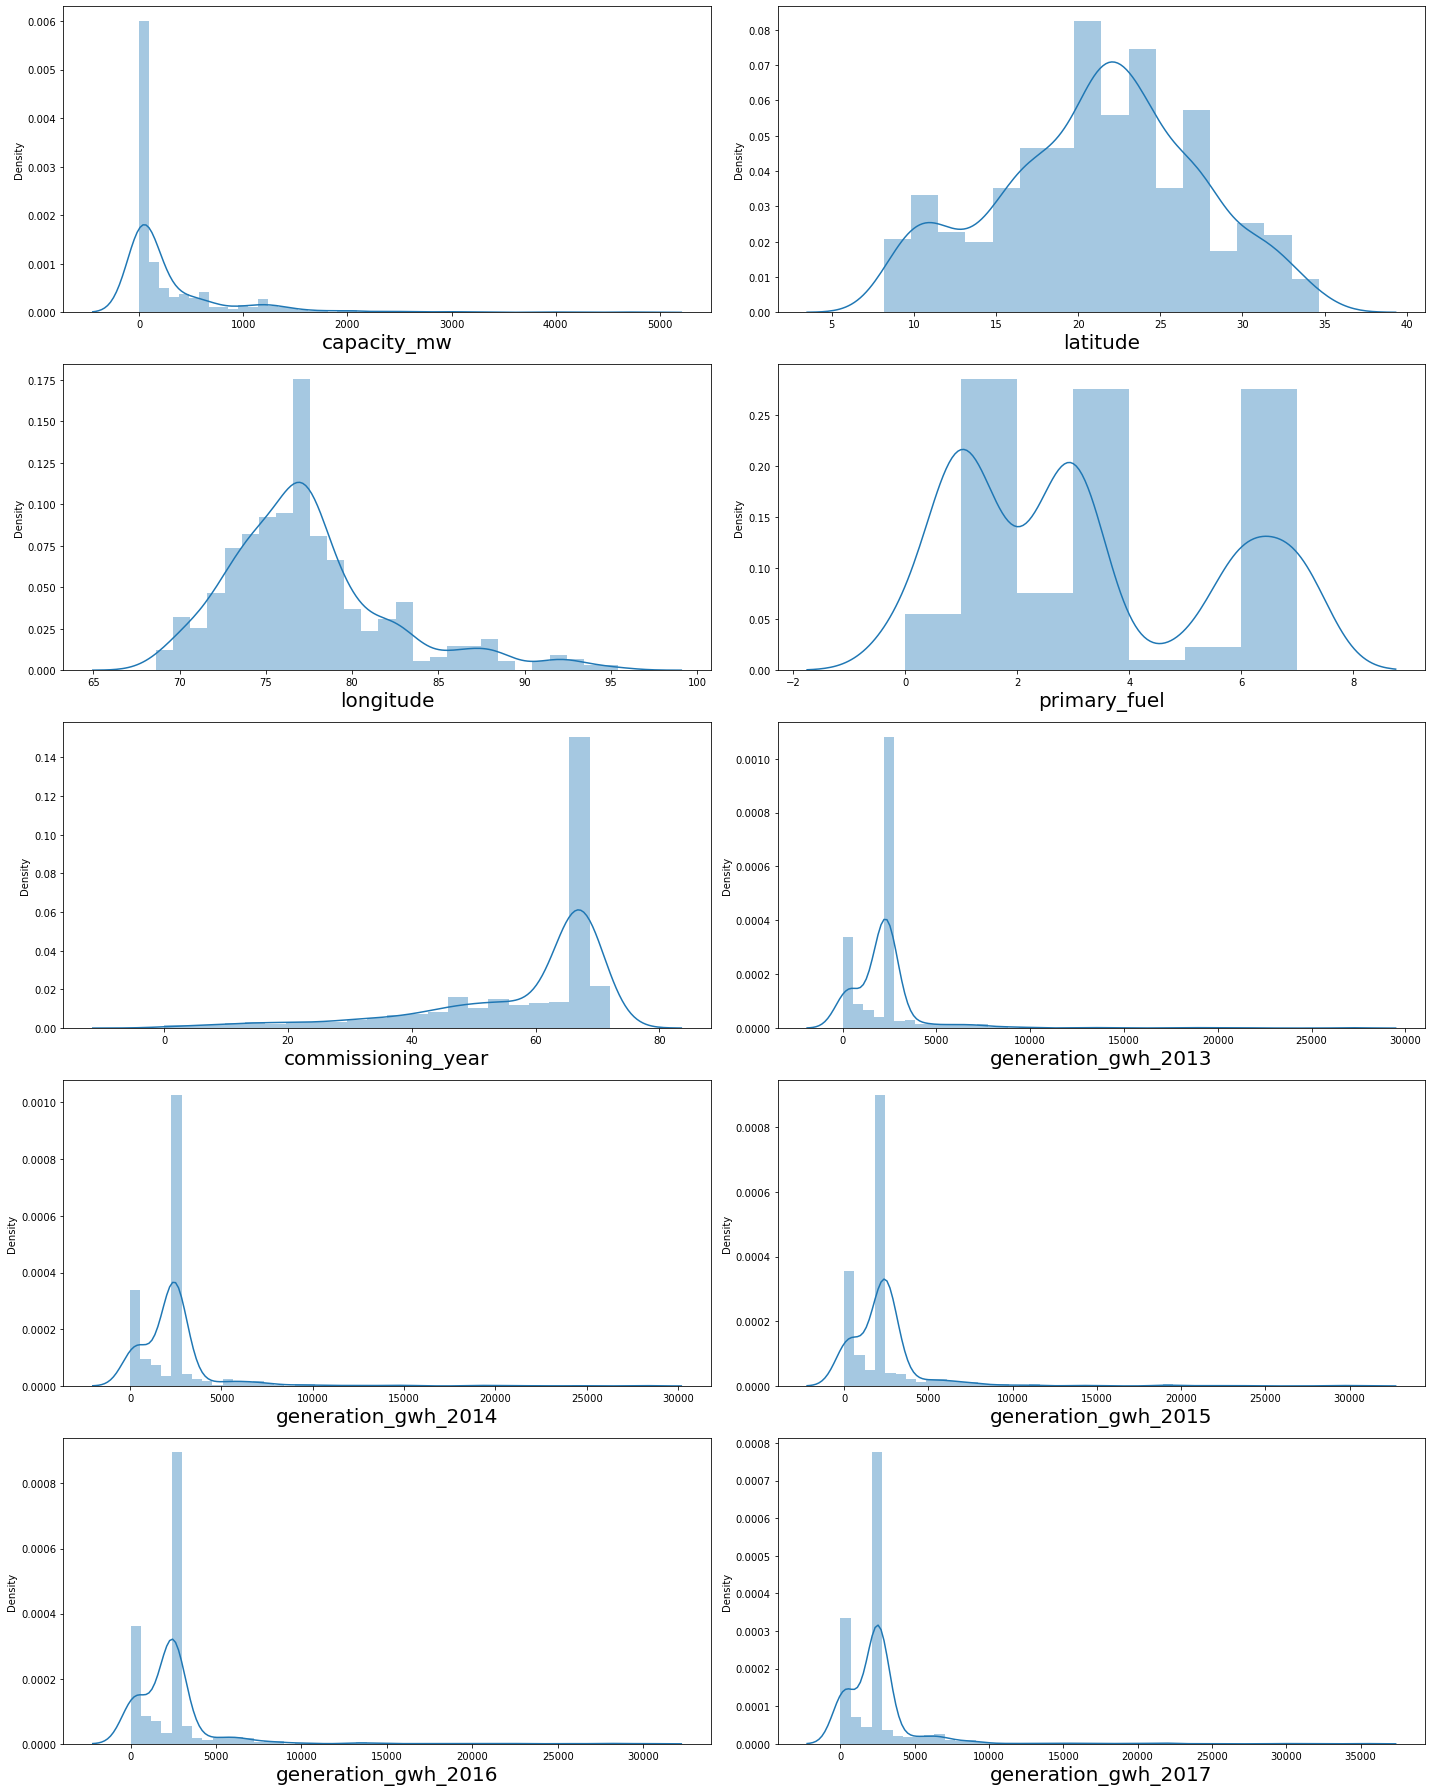

In [47]:
#Lets again check for data using dist plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Skewness is present in the dataset .

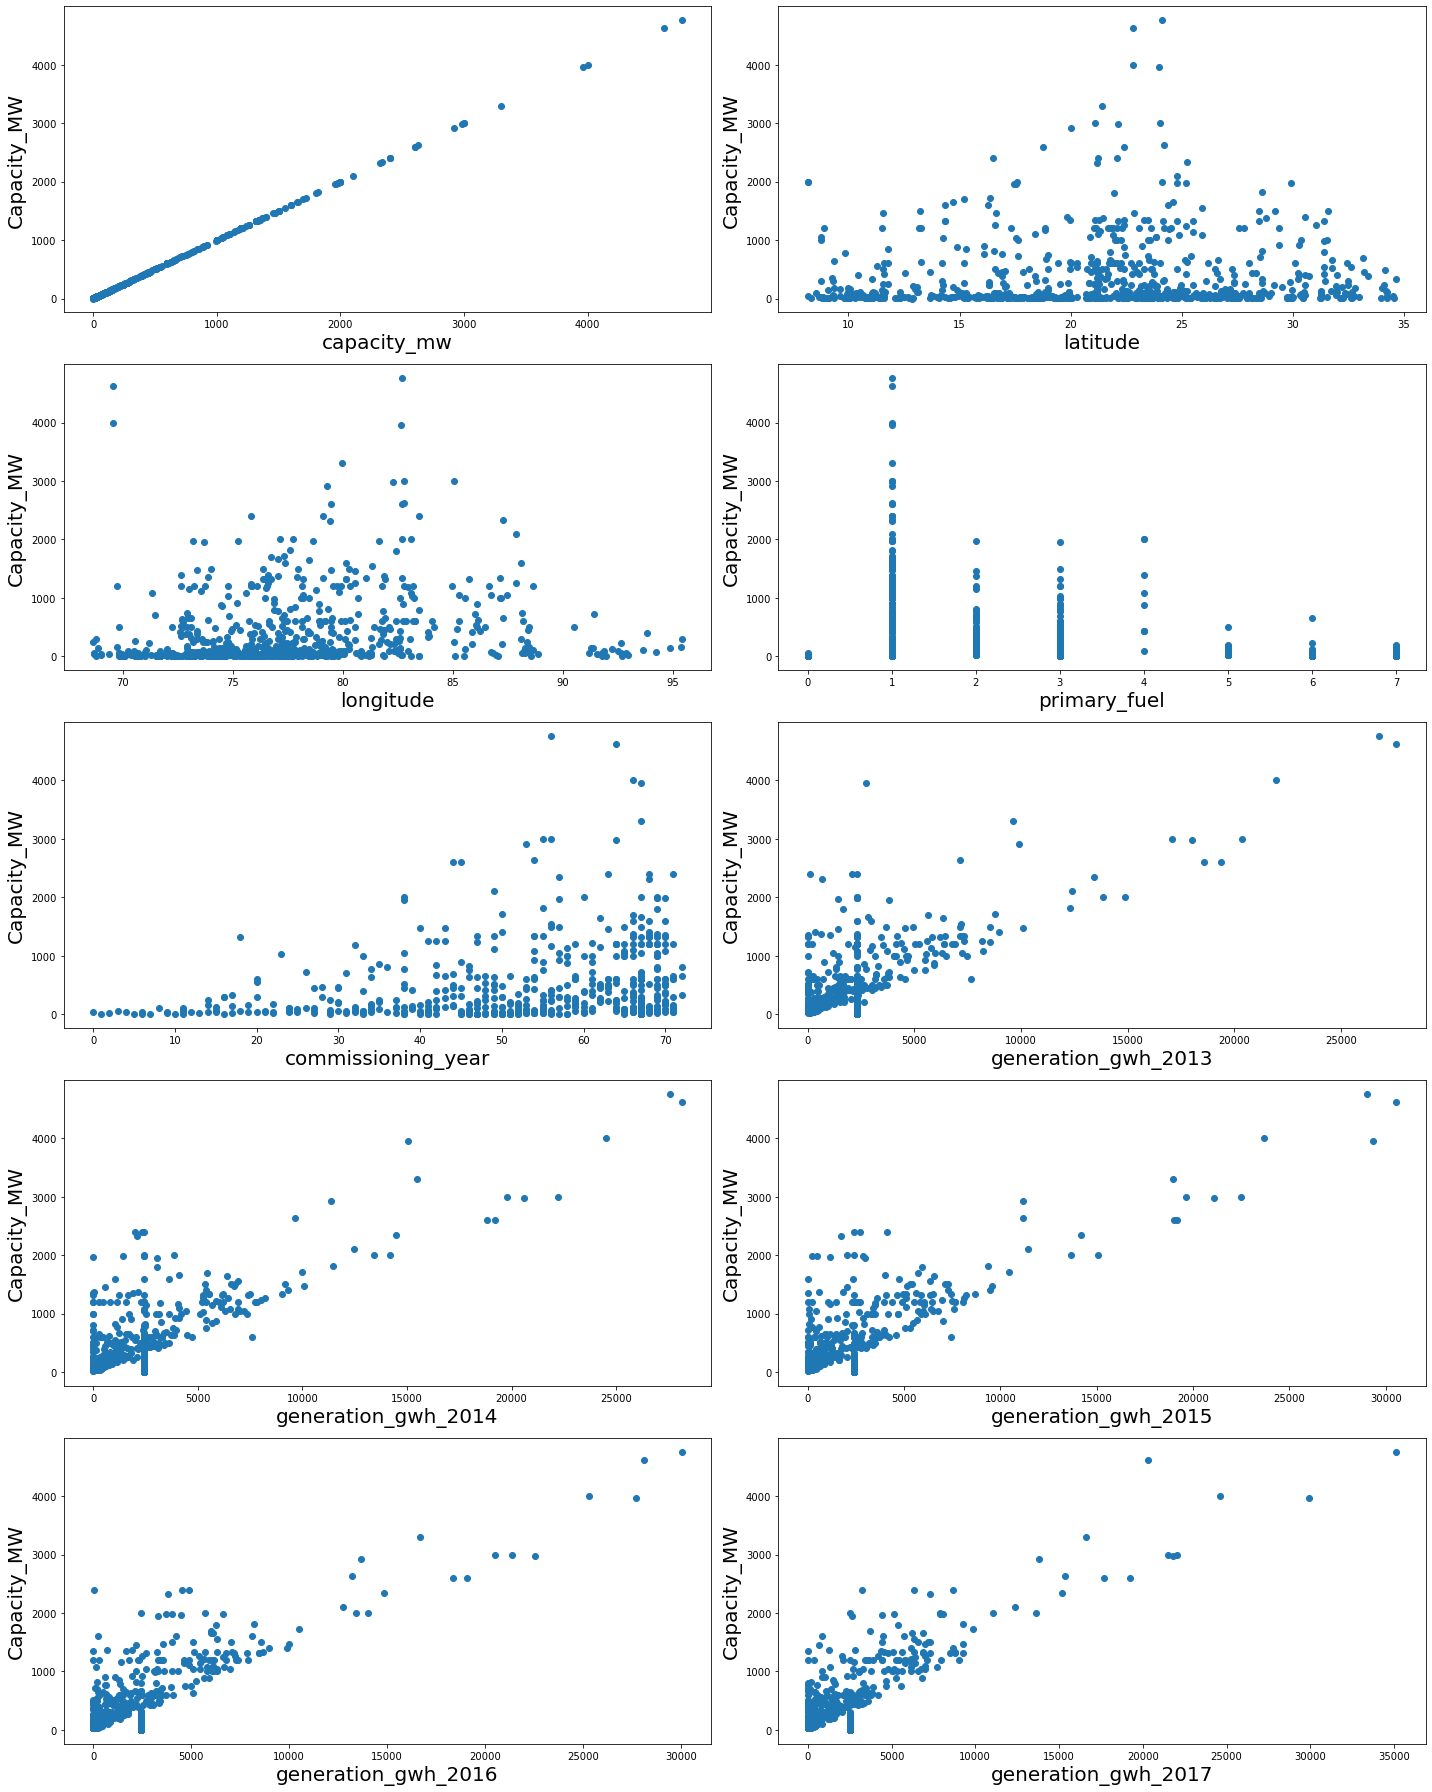

In [48]:
#Lets plot scatter plot to check the relation between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        plt.scatter(df[column],df['capacity_mw'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Capacity_MW',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [49]:
#Let's check the correlation 

df_corr= df.corr()
df_corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.197124,-0.377783,0.010866,0.667842,0.705434,0.722081,0.752829,0.767040
latitude,0.049790,1.000000,0.031501,-0.013453,0.031122,0.036639,0.044085,0.036127,0.030932,0.030655
longitude,0.197124,0.031501,1.000000,-0.348710,-0.147510,0.014021,0.011669,0.019176,0.039758,0.040407
primary_fuel,-0.377783,-0.013453,-0.348710,1.000000,0.147353,-0.120512,-0.125000,-0.125138,-0.131358,-0.132174
commissioning_year,0.010866,0.031122,-0.147510,0.147353,1.000000,0.094119,0.114465,0.127576,0.147762,0.148358
generation_gwh_2013,0.667842,0.036639,0.014021,-0.120512,0.094119,1.000000,0.963454,0.896376,0.873542,0.830639
generation_gwh_2014,0.705434,0.044085,0.011669,-0.125000,0.114465,0.963454,1.000000,0.953712,0.926010,0.891872
generation_gwh_2015,0.722081,0.036127,0.019176,-0.125138,0.127576,0.896376,0.953712,1.000000,0.968969,0.928459
generation_gwh_2016,0.752829,0.030932,0.039758,-0.131358,0.147762,0.873542,0.926010,0.968969,1.000000,0.964786
generation_gwh_2017,0.767040,0.030655,0.040407,-0.132174,0.148358,0.830639,0.891872,0.928459,0.964786,1.000000


<AxesSubplot:>

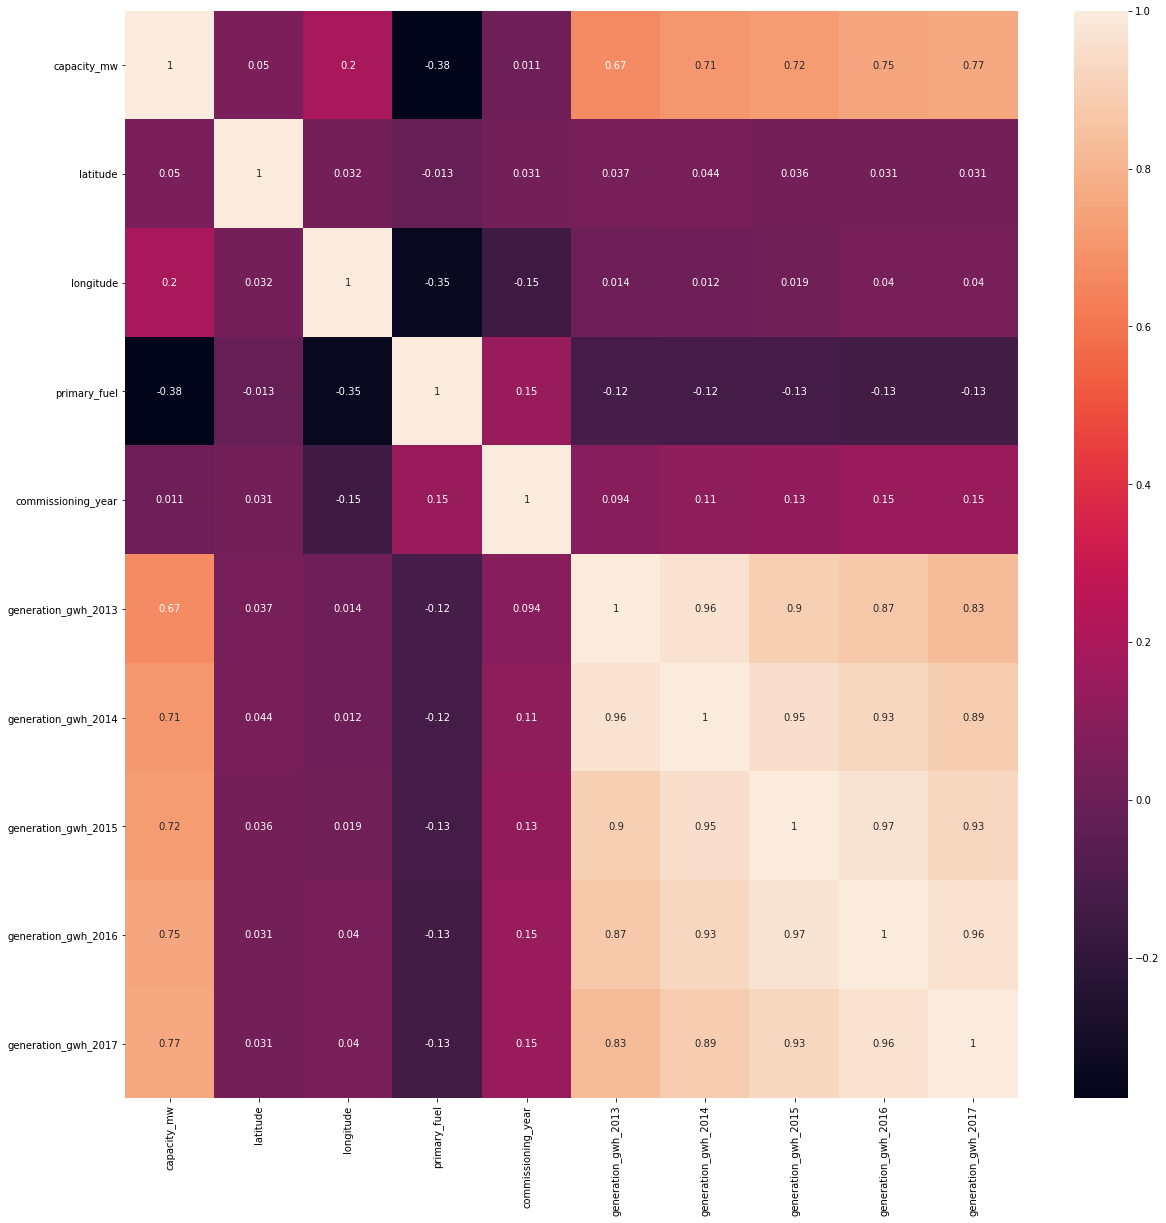

In [50]:
#Heatmap for correlation 
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot= True)

From above , we can see that all gereration_gwh features having highly positive correlation with label( capacity_mw)

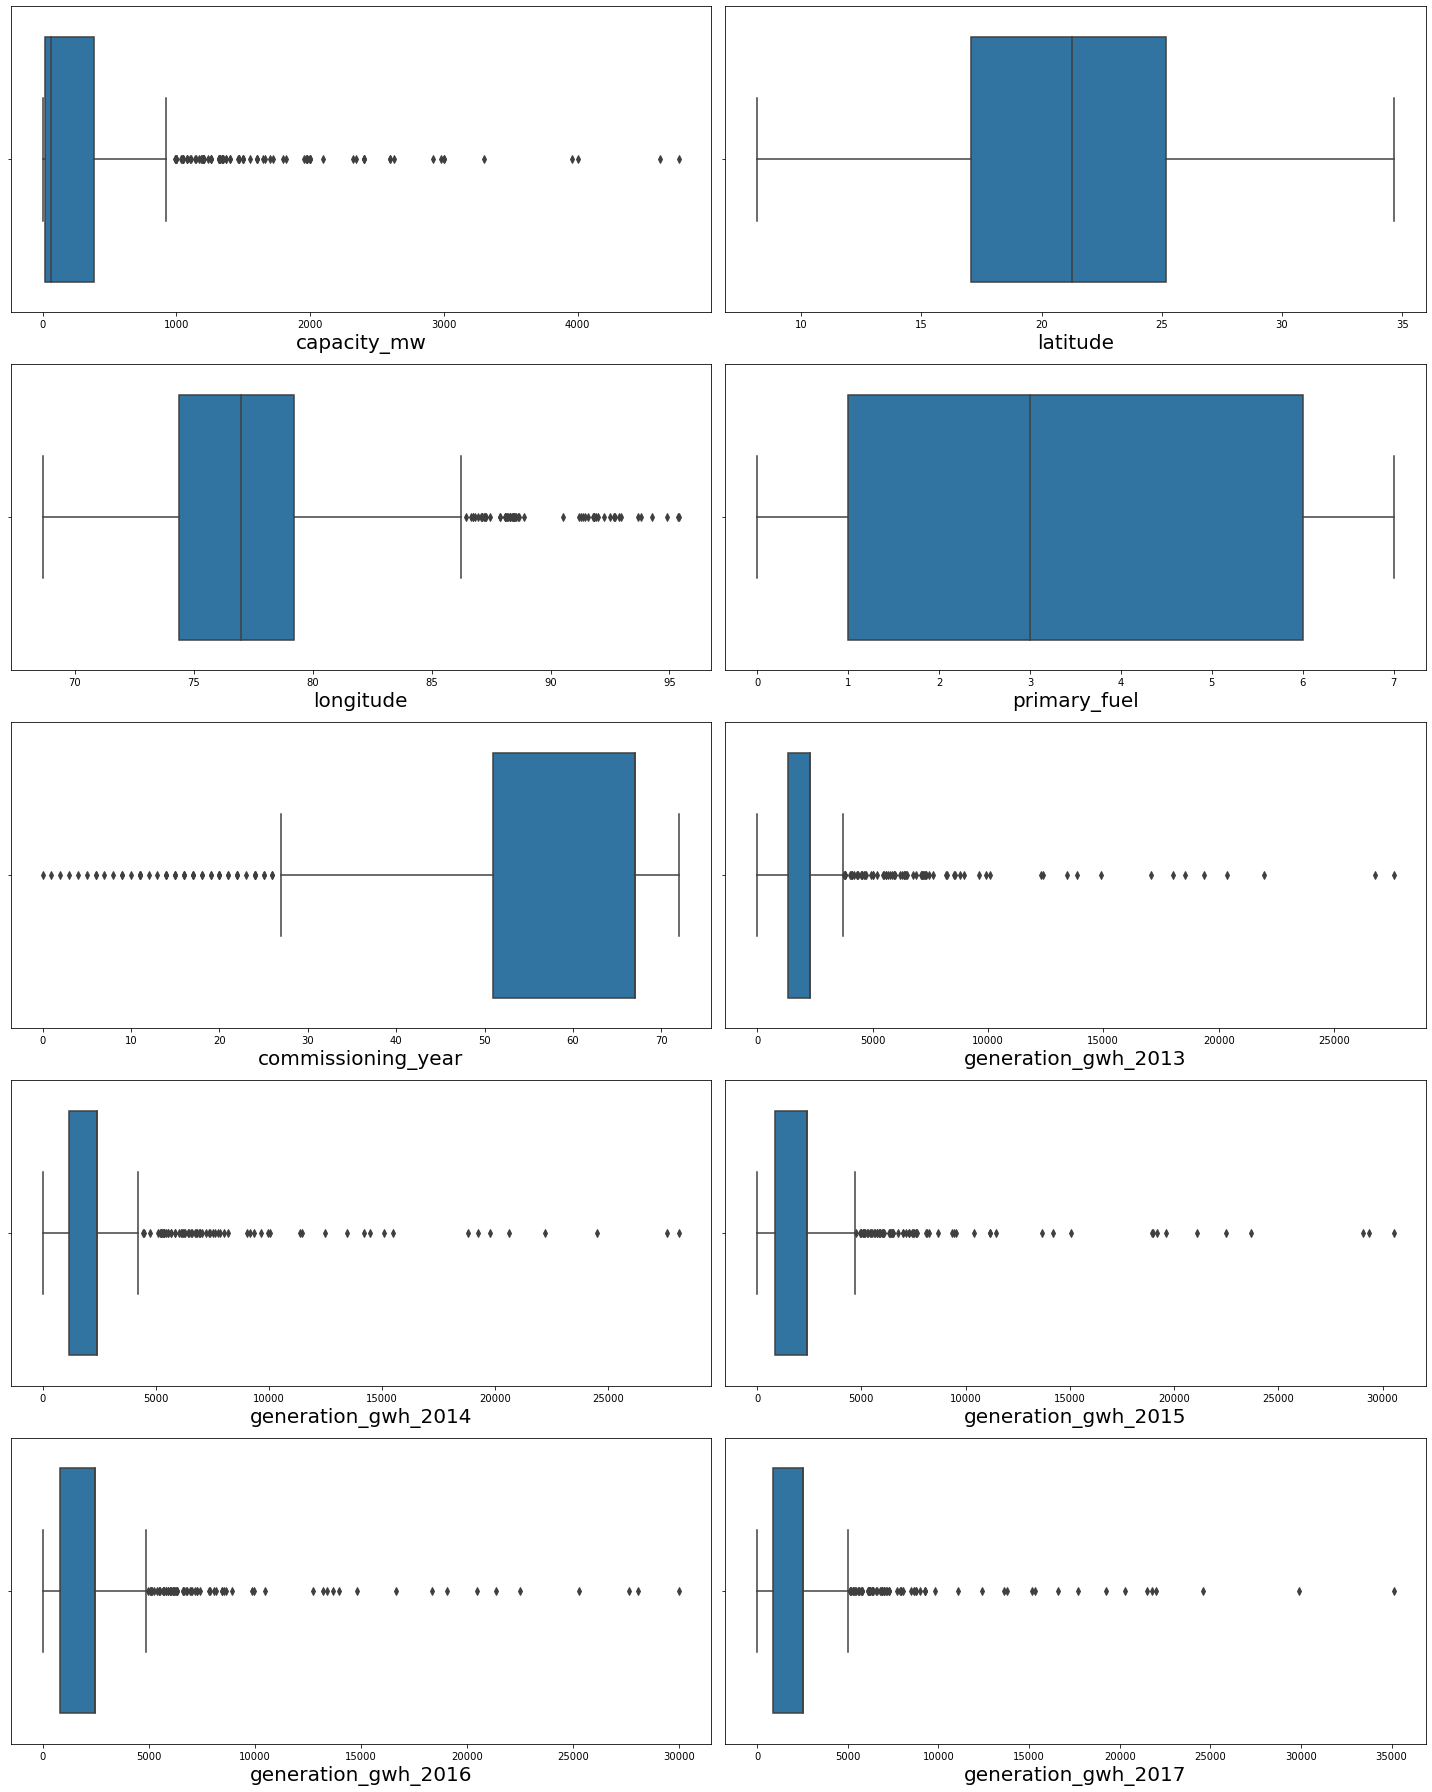

In [51]:
#lets check for outliers using box plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Outliers are present in the dataset .

## Outliers

In [52]:
#Removing the ouliers

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[5.49310543e-01, 1.14839610e+00, 8.80420380e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [3.84627594e-01, 5.86730280e-01, 5.94079309e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [4.86024006e-01, 1.16292425e-01, 1.68976343e+00, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       ...,
       [5.09648681e-01, 9.72986914e-01, 3.90650123e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [4.15667312e-01, 5.18313414e-01, 7.74321627e-01, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [5.25168540e-01, 1.85081984e+00, 6.05876281e-03, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16]])

In [53]:
print(np.where(z>3))


(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
       184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
       309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
       365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
       494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
       530, 533, 539, 542, 547, 575, 584, 593, 602, 622, 639, 649, 649,
       649, 649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696,
       696, 696, 707, 710, 722, 722, 722, 722, 725, 725, 725, 725, 725,
       727, 727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787,
       789, 808, 809, 809, 809, 809, 809, 819, 848, 849, 849, 881, 881,
       881, 881, 881, 881], dtype=int64), array([0, 7, 8, 9, 0, 5, 6, 7, 8, 9, 5, 6, 2, 2, 0, 5, 6, 7, 8, 9, 4, 2,
       2, 0, 5, 6, 7, 8, 9, 2, 2, 2, 4, 2, 0, 0, 5, 6, 7, 8, 9, 4, 0, 2,
       2, 2, 4, 4, 4, 0, 4, 0, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 2, 2, 2,
       5, 4, 4, 2,

In [54]:
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,65,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,67,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,67,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,58,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,69,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,70,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,67,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,67,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,67,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [55]:
df_new.shape  #after removing the outliers

(849, 10)

## Skewness

In [56]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.129836
primary_fuel           0.471141
commissioning_year    -1.680860
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [57]:
for index in df.skew().index:
    if df.skew().loc[index]>0.55:
        df[index]=np.cbrt(df[index])

In [58]:
df.skew()

capacity_mw            1.006476
latitude              -0.147391
longitude              0.990398
primary_fuel           0.471141
commissioning_year    -1.680860
generation_gwh_2013   -0.324073
generation_gwh_2014   -0.357695
generation_gwh_2015   -0.263571
generation_gwh_2016   -0.273079
generation_gwh_2017   -0.323046
dtype: float64

## Scaling and splitting the data into feature are labels

In [59]:
# lets divide the data into x and y 

x= df.drop(['capacity_mw'], axis=1)
x

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,4.183928,6,65,13.207822,13.426474,13.414776,13.488213,13.629310
1,24.7663,4.209822,1,67,13.207822,13.426474,13.414776,13.488213,13.629310
2,21.9038,4.108947,7,67,13.207822,13.426474,13.414776,13.488213,13.629310
3,23.8712,4.503868,2,58,8.580676,8.516872,9.449397,9.604586,8.723154
4,21.9603,4.351694,1,69,11.860159,14.479241,18.086385,18.413278,17.528476
...,...,...,...,...,...,...,...,...,...
903,16.2949,4.260882,1,70,13.207822,13.426474,0.998289,6.158697,9.529548
904,12.8932,4.275677,6,67,13.207822,13.426474,13.414776,13.488213,13.629310
905,15.2758,4.228027,7,67,13.207822,13.426474,13.414776,13.488213,13.629310
906,24.3500,4.193560,1,67,13.207822,13.426474,13.414776,13.488213,13.629310


In [60]:
y=df['capacity_mw']
y

0       1.357209
1       4.610436
2       3.396999
3       5.129928
4      12.164404
         ...    
903    11.696071
904     1.442250
905     2.943383
906     4.308869
907     2.545822
Name: capacity_mw, Length: 908, dtype: float64

In [61]:
#Applying the standard scaling on the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.1483961 , -0.89464694,  1.22541756, ...,  0.33091881,
         0.33430558,  0.33431114],
       [ 0.58673028, -0.5933203 , -0.96748576, ...,  0.33091881,
         0.33430558,  0.33431114],
       [ 0.11629242, -1.7671719 ,  1.66399822, ...,  0.33091881,
         0.33430558,  0.33431114],
       ...,
       [-0.97298691, -0.38147619,  1.66399822, ...,  0.33091881,
         0.33430558,  0.33431114],
       [ 0.51831341, -0.78256134, -0.96748576, ...,  0.33091881,
         0.33430558,  0.33431114],
       [-1.85081984,  0.02647455,  1.66399822, ...,  0.33091881,
         0.33430558,  0.33431114]])

### Train / Test Split

In [62]:
#splitting the dataset into train and test using train_test_split method
#importing train test split
from sklearn.model_selection import train_test_split
#dividing the x and y variables into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [63]:
x_train.shape

(635, 9)

In [64]:
y_train.shape

(635,)

In [65]:
x_test.shape

(273, 9)

In [66]:
x_train.shape

(635, 9)

# ML Models

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [87]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=40)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=40)
rf=RandomForestRegressor(random_state=40)
GBR=GradientBoostingRegressor(random_state=40)
xgb=XGBRegressor(random_state=40)

In [88]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",GBR))
models.append(("XGBRegressor",xgb))

In [89]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('------------------------------------->',name,'<-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=20,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

-------------------------------------> LinearRegression <-------------------------------
LinearRegression()
R2_score =  0.2888709062383532
Mean_Squared_Error = 7.458089542138394
Mean_Absolute_Error = 2.2111103864286537
Root_Mean_Squared_Error = 2.730950300195592
Cross_Val_Score =  0.2888960232196538


-------------------------------------> Lasso <-------------------------------
Lasso()
R2_score =  0.1551807865540863
Mean_Squared_Error = 8.86018782816163
Mean_Absolute_Error = 2.3865353130663194
Root_Mean_Squared_Error = 2.9766067641127254
Cross_Val_Score =  0.12820042925441189


-------------------------------------> Ridge <-------------------------------
Ridge()
R2_score =  0.28901519770759154
Mean_Squared_Error = 7.456576260362713
Mean_Absolute_Error = 2.2108094886310075
Root_Mean_Squared_Error = 2.7306732247492946
Cross_Val_Score =  0.2890319648308063


-------------------------------------> DecisionTreeRegressor <-------------------------------
DecisionTreeRegressor(random_state=40)

In [90]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.288871,7.458090,2.211110,2.730950,0.288896
1,Lasso,0.155181,8.860188,2.386535,2.976607,0.128200
2,Ridge,0.289015,7.456576,2.210809,2.730673,0.289032
3,DecisionTreeRegressor,0.754637,2.573285,1.144030,1.604146,0.747558
4,AdaBoostRegressor,0.785667,2.247852,1.273062,1.499284,0.763727
5,RandomForestRegressor,0.864912,1.416760,0.879885,1.190277,0.851698
6,GradientBoostingRegressor,0.864566,1.420385,0.871105,1.191799,0.844971
7,XGBRegressor,0.862618,1.440822,0.876000,1.200342,0.840366


from above we can see that random forest is working best with less difference between R2_score and CV Score, 86% accuracy.

# Hyper Parameter tuning using Grid search CV 

In [91]:
params={"n_estimators":[20,40,80],"max_features":["auto", "log2"],"min_samples_split":[2,4,8],"bootstrap":[True, False],'max_depth':[5,10,15],'min_samples_leaf':np.arange(2,10)}

In [92]:
grid = GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)

In [93]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [20, 40, 80]})

In [94]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [95]:
rf=RandomForestRegressor(bootstrap=False,max_depth=10,max_features='log2',min_samples_leaf=2,min_samples_split=4,n_estimators=20)
rf.fit(x_train,y_train)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('r2_score' ,r2_score(rf_pred,y_test))
rf_cv=cross_val_score(rf,x,y,cv=5)
print('CV_Score', rf_cv.mean())

r2_score 0.8472045463628903
CV_Score 0.8707605398254747


In [96]:
import joblib
joblib.dump(rf,"Global power capacity in MW prediction.csv")

['Global power capacity in MW prediction.csv']

In [97]:
model=joblib.load("Global power capacity in MW prediction.csv")

### conclusion

In [98]:
pred_= model.predict(x_test)
print("Prediction", pred_)
print("Actual", y_test)

Prediction [ 3.62389552  3.81448426  3.00895727  1.76222519  3.24625377  7.84823795
  4.51508702  2.79492819  7.32069601  2.76861891  2.65236262  7.43700181
  7.23179564 10.59652019  4.41548551 11.9163275   2.21597486  7.24061369
  7.78452551  4.07867305  5.33726679  2.96425639  1.82300828  2.79492819
  2.90542879  7.14699315  6.5279064   1.51289004  7.01448438  7.48179598
  5.44639114  8.76249246  9.96452752  8.59678344  3.38961771  4.85485544
  9.6969008   5.64553114  5.01681713  6.16826501  2.46006624  5.46871125
  2.27539276 11.40284596  2.73065589  2.76861891  3.41701422  4.59537759
  2.280933    2.75821115  2.83648419  3.11407746  2.20511664  2.27758975
  2.28693099  8.93192726  2.27539276  2.57623466  3.27827097  4.78476307
  6.94005327  4.88088324  5.07466769 10.05402415  3.40863765  6.67060751
  2.27807185  2.30331162  1.88998776  2.34103402  2.34103402  3.42177753
  6.28774858  2.33910246  2.77569637  2.89830371  2.25050523  2.31394427
  2.33784369  5.23181718  2.79492819  2.

In [99]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred_))
print('mean squared error:', mean_squared_error(y_test,pred_))

error:
mean absolute error: 0.834564550531437
mean squared error: 1.3047668853278669


# Predicting the Primary fuel

In [100]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.357209,28.1839,4.183928,6,65,13.207822,13.426474,13.414776,13.488213,13.629310
1,4.610436,24.7663,4.209822,1,67,13.207822,13.426474,13.414776,13.488213,13.629310
2,3.396999,21.9038,4.108947,7,67,13.207822,13.426474,13.414776,13.488213,13.629310
3,5.129928,23.8712,4.503868,2,58,8.580676,8.516872,9.449397,9.604586,8.723154
4,12.164404,21.9603,4.351694,1,69,11.860159,14.479241,18.086385,18.413278,17.528476


In [101]:
df.shape

(908, 10)

In [102]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.13197628, 1.1483961 , 0.89464694, ..., 0.33091881, 0.33430558,
        0.33431114],
       [0.13005423, 0.58673028, 0.5933203 , ..., 0.33091881, 0.33430558,
        0.33431114],
       [0.50376621, 0.11629242, 1.7671719 , ..., 0.33091881, 0.33430558,
        0.33431114],
       ...,
       [0.64346985, 0.97298691, 0.38147619, ..., 0.33091881, 0.33430558,
        0.33431114],
       [0.22293016, 0.51831341, 0.78256134, ..., 0.33091881, 0.33430558,
        0.33431114],
       [0.76590983, 1.85081984, 0.02647455, ..., 0.33091881, 0.33430558,
        0.33431114]])

In [103]:
print(np.where(z>3))

(array([180, 184, 222, 245, 324, 334, 341, 343, 361, 365, 365, 365, 365,
       365, 372, 417, 428, 445, 455, 479, 485, 494, 494, 494, 494, 494,
       494, 495, 495, 495, 495, 495, 495, 520, 539, 542, 575, 584, 593,
       602, 622, 639, 649, 649, 649, 649, 649, 658, 658, 658, 658, 696,
       696, 696, 696, 707, 710, 725, 727, 727, 727, 727, 727, 729, 787,
       787, 787, 787, 787, 808, 809, 809, 819, 849, 881, 881, 881, 881,
       881, 881], dtype=int64), array([2, 2, 4, 2, 2, 2, 2, 4, 2, 5, 6, 7, 8, 9, 4, 2, 2, 4, 4, 4, 4, 0,
       5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 2, 4, 4, 4, 4, 4, 4, 4, 2, 5, 6,
       7, 8, 9, 5, 6, 7, 8, 0, 7, 8, 9, 4, 4, 5, 5, 6, 7, 8, 9, 4, 5, 6,
       7, 8, 9, 4, 0, 7, 2, 4, 0, 5, 6, 7, 8, 9], dtype=int64))


In [104]:
z[180][2]

3.135153691131592

In [105]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(866, 10)

In [106]:
#split the dataset
x= df_new.drop(['primary_fuel'],axis=1)
x

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.357209,28.1839,4.183928,65,13.207822,13.426474,13.414776,13.488213,13.629310
1,4.610436,24.7663,4.209822,67,13.207822,13.426474,13.414776,13.488213,13.629310
2,3.396999,21.9038,4.108947,67,13.207822,13.426474,13.414776,13.488213,13.629310
3,5.129928,23.8712,4.503868,58,8.580676,8.516872,9.449397,9.604586,8.723154
4,12.164404,21.9603,4.351694,69,11.860159,14.479241,18.086385,18.413278,17.528476
...,...,...,...,...,...,...,...,...,...
903,11.696071,16.2949,4.260882,70,13.207822,13.426474,0.998289,6.158697,9.529548
904,1.442250,12.8932,4.275677,67,13.207822,13.426474,13.414776,13.488213,13.629310
905,2.943383,15.2758,4.228027,67,13.207822,13.426474,13.414776,13.488213,13.629310
906,4.308869,24.3500,4.193560,67,13.207822,13.426474,13.414776,13.488213,13.629310


In [107]:
y= df_new['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 866, dtype: int64

In [108]:
df['primary_fuel'].value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

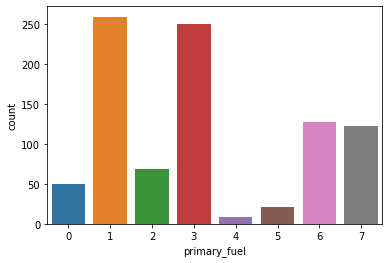

In [109]:
sns.countplot(df['primary_fuel'])

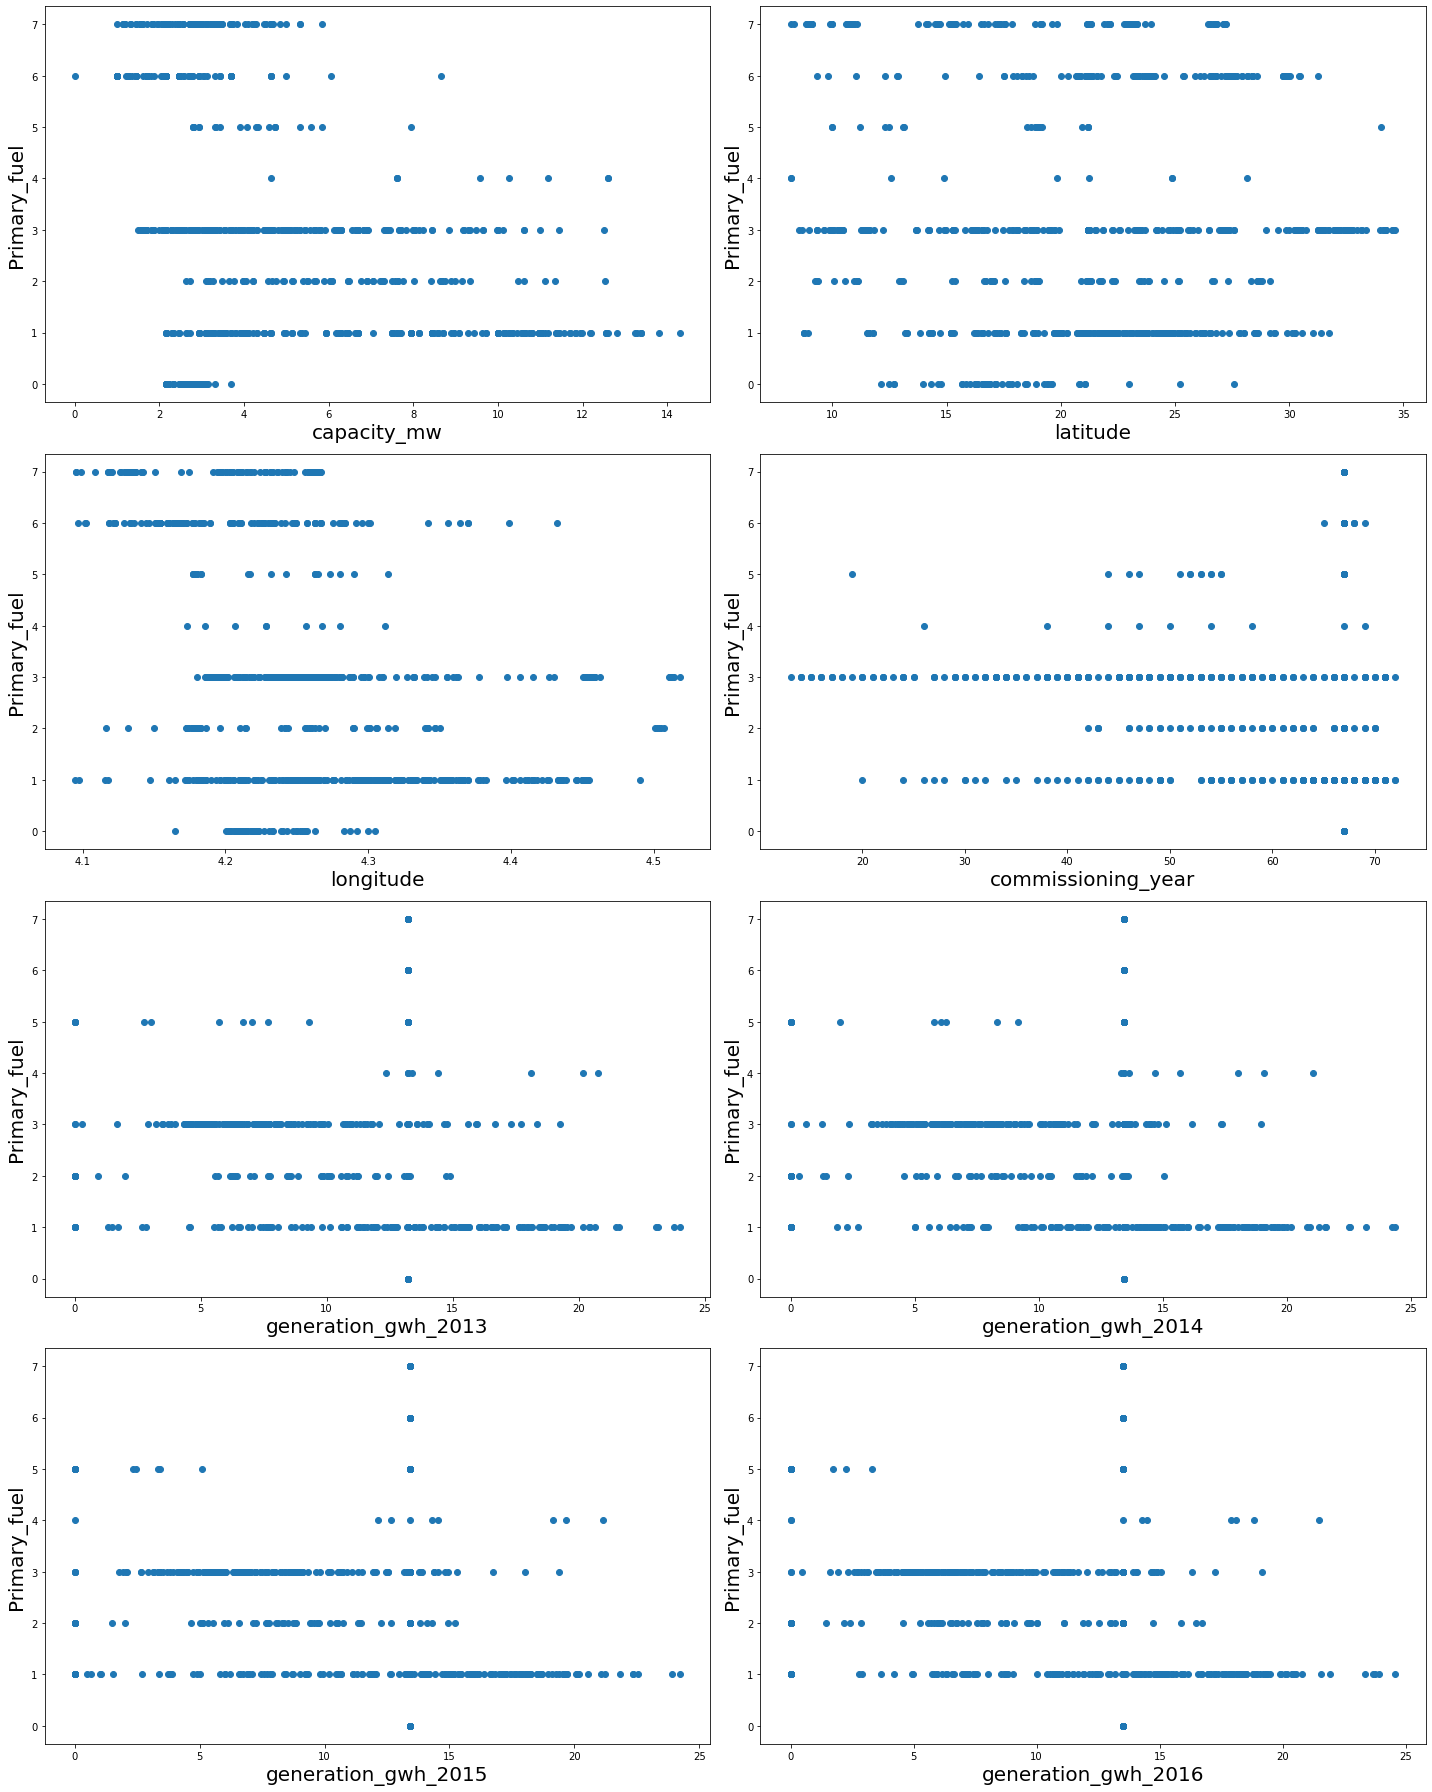

In [110]:
#Lets plot scatter plot to check the relation between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Primary_fuel',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [111]:
#Transforming data to remove skewness
#Importing power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method=('yeo-johnson'))
x

array([[-1.6354614 ,  1.16342171, -0.93981223, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [ 0.17855344,  0.58963309, -0.52331535, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [-0.30628607,  0.11375889, -2.37219385, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       ...,
       [-0.52904212, -0.96849986, -0.25135619, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [ 0.07027656,  0.52014612, -0.78037697, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [-0.75019579, -1.81509044,  0.22821747, ...,  0.33038293,
         0.3336475 ,  0.32799995]])

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.6354614 ,  1.16342171, -0.9400725 , ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [ 0.17855344,  0.58963309, -0.5235756 , ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [-0.30628607,  0.11375889, -2.37245416, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       ...,
       [-0.52904212, -0.96849986, -0.25161643, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [ 0.07027656,  0.52014612, -0.78063723, ...,  0.33038293,
         0.3336475 ,  0.32799995],
       [-0.75019579, -1.81509044,  0.22795724, ...,  0.33038293,
         0.3336475 ,  0.32799995]])

# SMOTE

In [113]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    248
1    248
2    248
3    248
4    248
5    248
6    248
7    248
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

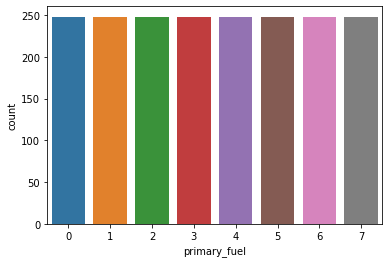

In [114]:
sns.countplot(y_over)

## Train_test split

In [115]:
#splitting the dataset into train and test using train_test_split method
#importing train test split
from sklearn.model_selection import train_test_split
#dividing the x and y variables into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=50)

In [116]:
#importing some of the libraries to build our model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,auc

In [117]:
KNN=KNeighborsClassifier()
SV=SVC()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)
xgb=XGBClassifier(random_state=56)

In [118]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('XGBClassifier', xgb))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [119]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x_over, y_over, cv=5, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')


---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.825503355704698


Cross_Val_Score =  0.8427473729740733


classification_report
               precision    recall  f1-score   support

           0       0.84      0.99      0.91        81
           1       0.78      0.55      0.65        73
           2       0.69      0.78      0.74        64
           3       0.89      0.83      0.86        66
           4       0.84      0.96      0.89        69
           5       0.83      0.94      0.88        80
           6       0.86      0.81      0.84        85
           7       0.85      0.73      0.79        78

    accuracy                           0.83       596
   macro avg       0.82      0.82      0.82       596
weighted avg       0.83      0.83      0.82       596



[[80  0  0  0  0  0  0  1]
 [ 4 40  9  6 10  1  2  1]
 [ 0  4 50  0  1  8  0  1]
 [ 0  1  7 55  2  1  0  0]
 [ 0  1  2  0 66  0  0  0]
 [ 0  1  3  1  0

In [120]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,0.825503,0.842747
1,SVC,0.743289,0.757564
2,XGBClassifier,0.872483,0.891647
3,DecisionTreeClassifier,0.820470,0.835193
4,GaussianNB,0.567114,0.562488
5,RandomForestClassifier,0.874161,0.892144
6,GradientBoostingClassifier,0.875839,0.876523
7,ExtraTreesClassifier,0.902685,0.912809
8,AdaBoostClassifier,0.318792,0.336186


ETC is working well with 90% accuracy score

# AUC-ROC Curve

In [149]:
!pip install scikit-plot

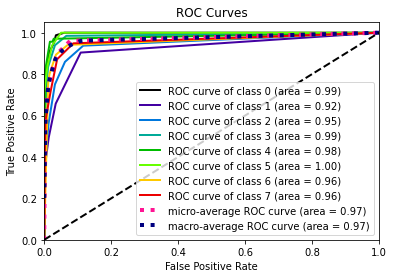

In [151]:
import scikitplot as skplt
#Lets find Roc Auc score
#KNN
probas=KNN.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

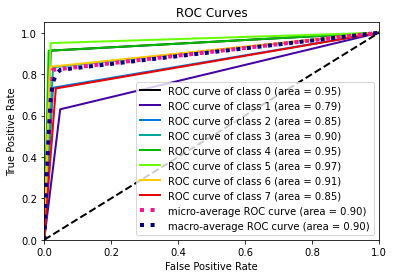

In [153]:
#Lets find Roc Auc score
#Decision TreeRandom forest
probas=DT.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()


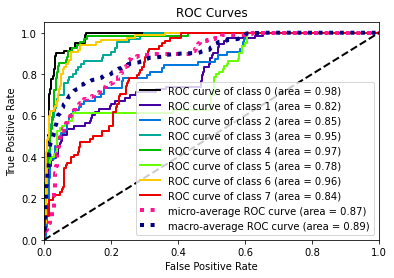

In [154]:
#Lets find Roc Auc score
#Navies Bayes
probas=GNB.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

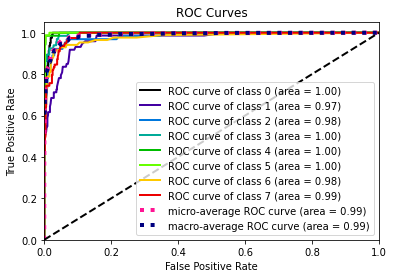

In [157]:
#Lets find Roc Auc score
#RFC
probas=RFC.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

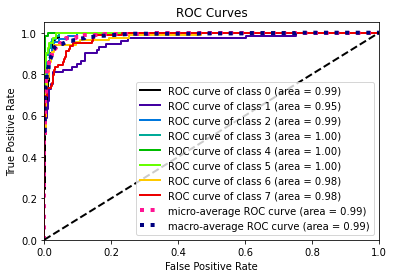

In [158]:
#Lets find Roc Auc score
#GBC
probas=GBC.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

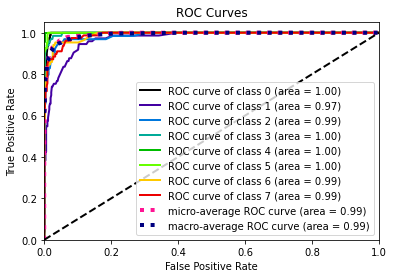

In [159]:
#Lets find Roc Auc score
#ETC
probas=ETC.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

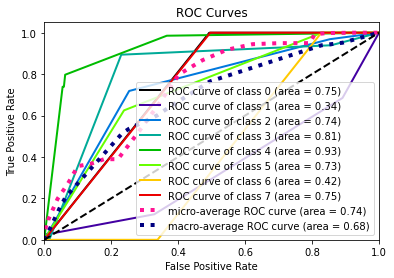

In [160]:
#Lets find Roc Auc score
#RFC
probas=ABC.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

# Hyper param tuning

In [123]:
#Randomised Search CV
param_grid={
    'max_depth':[5,10],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion':['gini','entropy']
}

In [124]:
random_search=RandomizedSearchCV(rf, param_grid,cv=5,n_jobs=-1)

In [125]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [20, 40, 80]})

In [126]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [131]:
rf=RandomForestRegressor(bootstrap=False,max_depth=10,max_features='log2',min_samples_leaf=2,min_samples_split=4,n_estimators=20)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('r2_score' ,r2_score(rf_pred,y_test))
rf_cv=cross_val_score(rf,x,y,cv=5)
print('CV_Score', rf_cv.mean())


r2_score 0.41362623591930614
CV_Score 0.5974148908928518


# Saving the model

In [132]:
import joblib
joblib.dump(ETC,"primaryfuel_prediction.csv")

['primaryfuel_prediction.csv']

In [133]:
model= joblib.load("primaryfuel_prediction.csv")
model

ExtraTreesClassifier(random_state=56)

In [136]:
pred_ETC= model.predict(x_test)
print("Prediction", pred_ETC)
print("actual", y_test)

Prediction [5 1 3 0 6 2 7 6 3 4 7 5 5 1 0 5 7 0 3 5 1 5 7 7 1 6 0 0 1 6 0 6 0 2 6 4 3
 3 1 0 4 5 0 0 0 6 3 7 3 0 3 3 3 7 3 2 4 1 0 2 0 1 4 4 1 6 5 2 6 5 0 5 1 1
 3 0 0 2 5 3 0 4 1 6 4 7 3 4 4 5 6 0 2 3 5 6 4 3 0 0 7 4 7 7 6 1 2 1 0 5 7
 6 5 7 6 7 3 4 3 5 0 7 0 6 7 5 4 5 1 5 5 1 0 4 3 0 2 1 0 2 7 7 6 1 3 2 6 5
 3 4 3 4 5 5 5 6 6 1 1 0 7 2 2 5 1 6 1 7 4 2 5 2 5 1 5 0 0 0 2 4 4 4 0 4 1
 4 4 0 7 2 5 4 0 1 7 0 7 2 1 2 2 0 4 7 3 3 5 7 4 0 1 2 6 1 6 0 2 0 1 6 7 3
 1 7 3 5 0 4 5 2 6 2 6 4 5 5 1 7 1 2 6 6 5 5 4 5 0 5 4 2 5 4 6 6 2 4 4 2 4
 0 4 2 5 5 0 7 3 6 4 1 6 1 0 0 6 6 4 7 2 0 6 7 4 0 5 5 4 7 5 2 5 3 7 4 6 1
 4 2 7 6 5 0 2 0 7 2 5 5 1 4 7 4 1 6 5 6 3 2 6 6 7 2 4 1 3 6 7 6 5 7 6 0 6
 6 1 0 7 7 5 7 4 3 5 3 6 1 7 3 7 3 6 0 4 7 0 6 2 7 3 0 5 6 5 0 5 6 0 3 1 0
 2 3 6 5 4 3 4 5 6 6 5 6 7 3 2 3 1 7 6 0 7 3 0 1 4 0 5 0 3 7 4 0 2 6 0 0 5
 5 3 0 7 1 3 0 4 7 2 6 5 5 6 1 3 3 7 3 3 1 6 1 1 1 1 7 6 2 0 4 0 0 6 7 4 7
 6 5 6 0 1 4 6 7 2 1 5 5 4 1 6 7 7 2 3 0 6 6 4 6 5 0 6 5 7 2 6 0 2 2 2 3 1
 4 5 0 0 4 1 1

In [137]:
print('error:')

print('mean absolute error:', mean_absolute_error(y_test,pred_xg))
print('mean squared error:', mean_squared_error(y_test,pred_xg))

error:
mean absolute error: 0.2802013422818792
mean squared error: 1.186241610738255
